# Figures and Results in the Main Text

In [1]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import import_ipynb
from common import *
warnings.filterwarnings('ignore')

importing Jupyter notebook from common.ipynb


In [2]:
_Figure_PATH_ = './figures/main/'

## Figure 1

### A and B

In [3]:
def figure_1AB(s_X, s_Y, payoff_subs, chi_sub = 2, fsize = (8, 8), ms = 10, fs = 16):
    
    eqs = (1 - (R - O)*phi*(chi - 1) - p_1, 
           1 - phi*((T - O)*chi + (O - S)) - p_2, 
           phi*((O - S)*chi + (T - O)) - p_3, 
           (O - P)*phi*(chi - 1) - p_4)
    s_gen = solve(eqs, p_1, p_2, p_3, p_4) 
    s_X_gen = s_X.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])
    s_Y_gen = s_Y.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])
    s_X_gen = cancel(s_X_gen.subs(phi, 1/((T - S)*chi + (T - S))).subs(chi, chi_sub))
    s_Y_gen = cancel(s_Y_gen.subs(phi, 1/((T - S)*chi + (T - S))).subs(chi, chi_sub))
    
    O_subs = [(O, P), (O, (R + P)/2), (O, R)]
    
    prop_cycle = plt.rcParams['axes.prop_cycle'] # the default colors of python
    colors = prop_cycle.by_key()['color']
    
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    
    fig.patch.set_facecolor('white')
    
    k = 2
    
    # the linear relation s_X - O = chi (s_Y - O)
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        q_1_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_2_subs = np.linspace(0, 1, 11)
        q_3_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
        q_4_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        q_1_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_2_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_3_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
        q_4_subs = np.concatenate((np.linspace(0, 0.01, 6), np.linspace(0.02, 0.1, 5), np.linspace(0.2, 1, 9)))
    for i, O_sub in enumerate(O_subs):
        lam_s_X = lambdify([q_1, q_2, q_3, q_4], cancel(s_X_gen.subs([O_sub] + payoff_subs)))
        lam_s_Y = lambdify([q_1, q_2, q_3, q_4], cancel(s_Y_gen.subs([O_sub] + payoff_subs)))
        for q_1_sub in q_1_subs:
            for q_2_sub in q_2_subs:
                for q_3_sub in q_3_subs:
                    x_values = lam_s_X(q_1_sub, q_2_sub, q_3_sub, q_4_subs)
                    y_values = lam_s_Y(q_1_sub, q_2_sub, q_3_sub, q_4_subs)
                    cc = [colors[3] if x < y else colors[0] for x, y in zip(x_values, y_values)]
                    plt.scatter(x_values, y_values, c = cc, marker = 'o', s = ms/5, alpha = 0.05)
    
    
    plt.plot(ss, tt, c = colors[k],marker = '.', markersize = ms)
    plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
    plt.plot((rr + pp)/2, (rr + pp)/2, c = colors[k], marker = '.', markersize = ms)
    
    plt.text(ss + 0.5, tt - 0.2, r'$(S, T)$', fontsize = fs - 2)
    plt.text(tt - 1, ss, r'$(T, S)$', fontsize = fs - 2)
    plt.text(rr + 0.1, rr + 0.1, r'$(R, R)$', fontsize = fs - 2)
    plt.text(pp - 0.3, pp - 0.3, r'$(P, P)$', fontsize = fs - 2)
    

    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2)
    ax.add_patch(polygon)
       
    # the line point from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2, ls = ':', marker = '.', 
                         markersize = ms, alpha = 1)
    ax.add_line(line_0)
    
    # the line point from (S, T) to (T, S)
    if 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        line_1 = plt.Line2D((ss, tt), (tt, ss), c = colors[k], lw = 2, ls = ':', marker = '.', 
                            markersize = ms, alpha = 1)
        ax.add_line(line_1)
        
    # legends
    legend_elements = [plt.Line2D([0], [0], color = colors[0], lw = 4, label = r'$s_X > s_Y$'),
                       plt.Line2D([0], [0], color = colors[3], lw = 4, label = r'$s_X < s_Y$')]
    
    plt.legend(handles = legend_elements, loc = (lambda x: 'upper right' if x else 'lower left')(2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]),  
               fancybox = True, fontsize = fs - 2)
        

    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    ax.set_xlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    ax.set_ylabel('Payoff of coplayer, ' + r'$s_Y$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')' + '\n' + r'$\chi = $' + str(chi_sub), fontsize = fs)
    
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + '1A.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + '1B.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

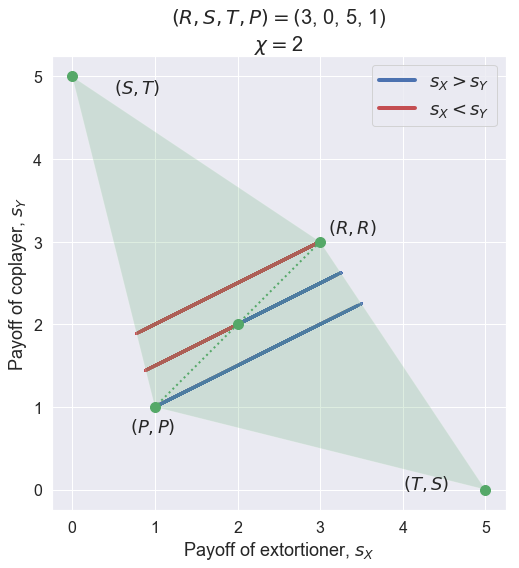

In [4]:
figure_1AB(s_X, s_Y, payoff_con_subs, chi_sub = 2, fsize = (8, 8), ms = 20, fs = 20) # fs = 18

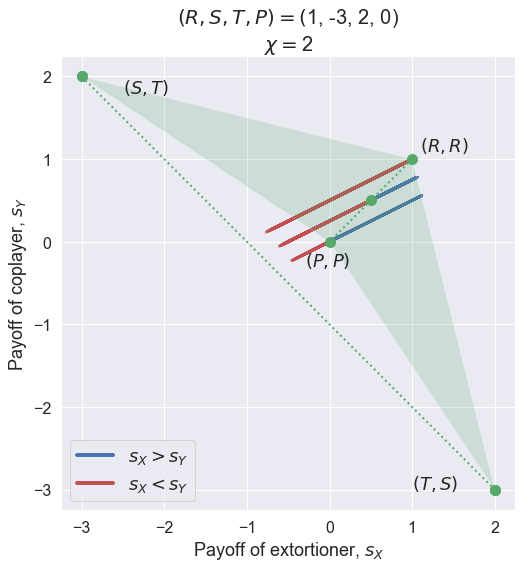

In [5]:
figure_1AB(s_X, s_Y, payoff_abn_subs, chi_sub = 2, fsize = (8, 8), ms = 20, fs = 20)

### C and D

In [6]:
def figure_1C(s_X, s_Y, payoff_subs, q_subs, name, fsize = (8, 6), fs = 16):
    
    colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    s_X = simplify(s_X.subs(payoff_subs))
    s_Y = simplify(s_Y.subs(payoff_subs))
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    
    color_dict = {'ZD Gen2': 0, 'Win-Stay Lose-Shift': 3}
    chi_list = np.linspace(1, 5, 101)
    s_X_temp = cancel(simplify(s_X.subs(q_subs)))
    s_X_list = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list]
    ax.plot(chi_list, s_X_list, color = colors[color_dict[name]], linewidth = 3, label = 'Extortionate ZD ' + r'$s_X$')
    s_Y_temp = cancel(simplify(s_Y.subs(q_subs)))
    s_Y_list = [s_Y_temp.subs(chi, chi_value) for chi_value in chi_list]
    dict_label_y = {'ZD Gen2': 'Generous ZD ', 'Win-Stay Lose-Shift': 'WSLS '}
    ax.plot(chi_list, s_Y_list, color = colors[color_dict[name]], linewidth = 3, linestyle = '--',  
            label = dict_label_y[name] + r'$s_Y$')
    
    dict_label = {'ZD Gen2': r'$R$', 'Win-Stay Lose-Shift': r'$\frac{T + P + S}{3}$'}
    ax.plot(chi_list, [s_X_list[0]]*len(chi_list), color = colors[7], linewidth = 3, linestyle = '--', label = dict_label[name])
    
    ax.set_xlabel('Extortion factor ' + r'$\chi$', fontsize = fs)
    ax.set_ylabel('Payoff', fontsize = fs)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    plt.legend(loc = 'upper right',  fancybox = True, fontsize = fs - 4)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')' + '\n' + r'$q = $' + name, fontsize = fs)
    
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + '1C.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + '1D.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

In [7]:
s_X_temp = simplify(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]))
s_Y_temp = simplify(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]))

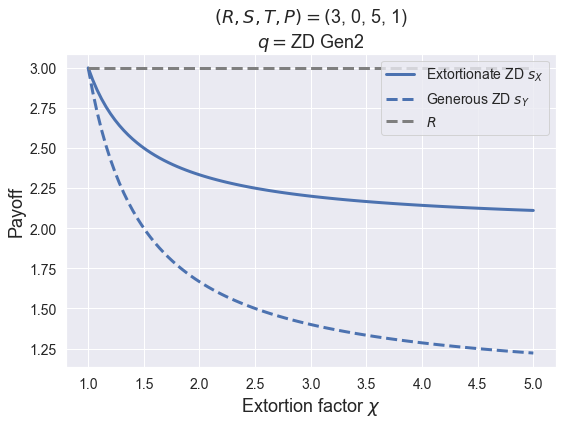

In [8]:
figure_1C(s_X_temp, s_Y_temp, payoff_con_subs, ZDGEN2_q, 'ZD Gen2', fsize = (8, 6), fs = 18)

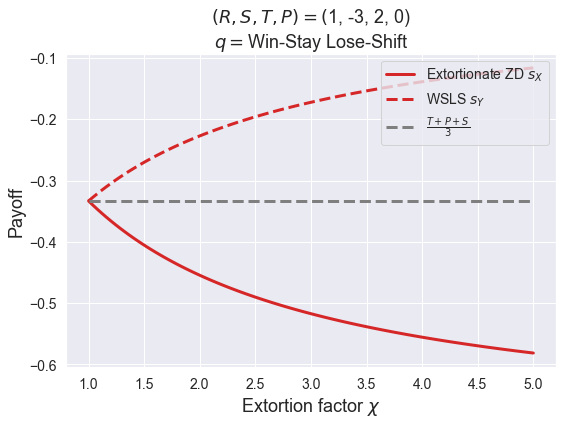

In [9]:
figure_1C(s_X_temp, s_Y_temp, payoff_abn_subs, WinStayLoseShift_q, 'Win-Stay Lose-Shift', fsize = (8, 6), fs = 18)

## Figure 2

### A and B

In [10]:
def figure_2AB(s_X, payoff_subs, q_subs, name, fsize = (8, 8), ms = 20, fs = 16):
    
    prop_cycle = plt.rcParams['axes.prop_cycle'] # the default colors of python
    colors = prop_cycle.by_key()['color']
    colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target  = cancel(num/((T - S)*(R - P)*q_4))
    target = collect(target, chi)
    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)
    
    if (2*payoff_subs[3][1] <= payoff_subs[2][1] + payoff_subs[1][1]): # 2P <= T + S
        f = lambdify([q_2], solve(e_2, q_4)[0].subs(payoff_subs), 'numpy')
        k = 0
    else:
        f = lambdify([q_2], solve(e_2 + e_1 + e_0, q_4)[0].subs(payoff_subs), 'numpy')
        k = 3
    
    fig = plt.figure(figsize = fsize)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    
    if (2*payoff_subs[3][1] < payoff_subs[2][1] + payoff_subs[1][1]):
        q_2_temp = (T + S - 2*P)*(P - S)/((T - P)*(T - S) - (P - S)**2)
        q_2_temp = float(q_2_temp.subs(payoff_subs))
        x = np.linspace(q_2_temp, 1, 101)
        y = f(x)
        y = np.where(y > 1, 1, y) # replace with 1
        
        
    elif (2*payoff_subs[3][1] > payoff_subs[2][1] + payoff_subs[1][1]):
        q_2_temp = ((R - P) + (2*R - T - S))/(2*R - P - S)
        q_2_temp = float(q_2_temp.subs(payoff_subs))
        x_head = np.linspace(0, q_2_temp, 101)
        x_tail = np.linspace(q_2_temp, 1, 101)
        y_head = np.full(x_head.shape, 1)
        y_tail = f(x_tail)
        x = np.concatenate((x_head, x_tail))
        y = np.concatenate((y_head, y_tail))
        
    ax.plot(x, y, color = colors[k], linewidth = 3, alpha = 0.8)
    ax.fill_between(x, y, color = colors[k], alpha = 0.1)
    
    plt.plot(q_subs[1][1], q_subs[3][1], c = colors[k], marker = '.', markersize = ms, alpha = 0.8)
    plt.text(q_subs[1][1] + 0.15, q_subs[3][1] - 0.075, name, size = fs - 2, horizontalalignment = 'center')
    
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$q_2$', fontsize = fs)
    ax.set_ylabel(r'$q_4$', fontsize = fs) 
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs)
    plt.axis(aspect = 'image')
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "2A.png", dpi = 400, bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "2B.png", dpi = 400, bbox_inches = 'tight')
    plt.show() 

In [11]:
s_XA = collect(cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), chi)

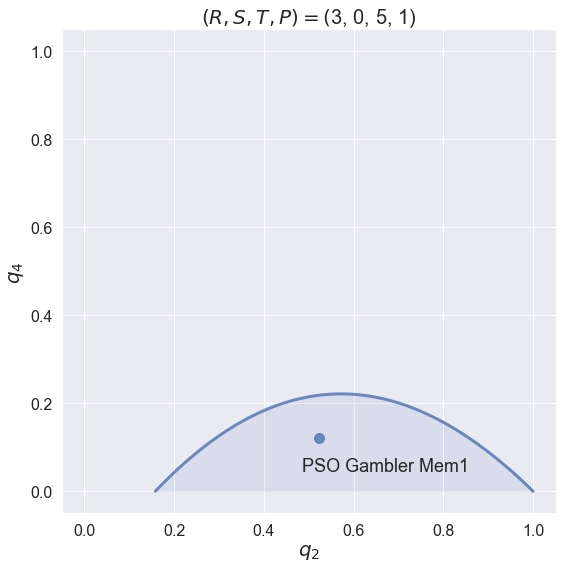

In [12]:
figure_2AB(s_XA, payoff_con_subs, PSOGamblerMem1_q, name = 'PSO Gambler Mem1', fsize = (8, 8), ms = 20, fs = 20)

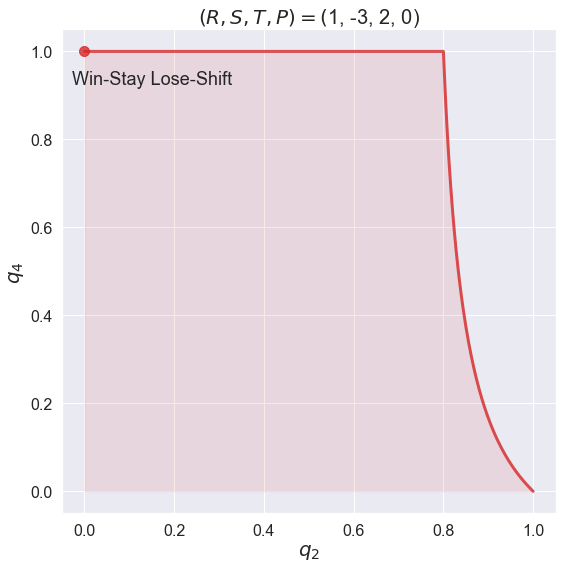

In [13]:
figure_2AB(s_XA, payoff_abn_subs, WinStayLoseShift_q, name = 'Win-Stay Lose-Shift', fsize = (8, 8), ms = 20, fs = 20)

### C and D

In [14]:
def figure_2CD(s_X, payoff_subs, q_subs, name, fsize = (8, 8), ms = 20, fs = 16):
    
    colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/((T - S)*q_4))
    f = lambdify([q_1], solve(target, q_4)[0].subs(payoff_subs), 'numpy')
    q_c = (2*P - T - S)/(R + P - T - S)
    q_c = float(q_c.subs(payoff_subs))
    q_C = (P - S)/(R - S)
    q_C = float(q_C.subs(payoff_subs))
    fig = plt.figure(figsize = fsize)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    
    if (2*payoff_subs[3][1] < payoff_subs[2][1] + payoff_subs[1][1]):
        x = np.linspace(q_C, 1, 101)
        y = f(x)
        k = 0
        ax.plot(x, y, color = colors[k], linewidth = 3, alpha = 0.8)
        ax.fill_between(x, y, color = colors[k], alpha = 0.1) 
        plt.plot(q_subs[1][1], q_subs[3][1], c = colors[k], marker = '.', markersize = ms, alpha = 0.8)
        plt.text(q_subs[1][1] - 0.1, q_subs[3][1] - 0.02, name, size = fs - 2, horizontalalignment = 'center')
    
    
    elif (2*payoff_subs[3][1] > payoff_subs[2][1] + payoff_subs[1][1]):
        x_head = np.linspace(0, q_c, 101)
        x_tail = np.linspace(q_C, 1, 101)
        y_head = np.full(x_head.shape, 1)
        y_tail = f(x_tail)
        k = 3
        ax.plot(x_head, y_head, color = colors[k], linewidth = 3, alpha = 0.8)
        ax.fill_between(x_head, y_head, color = colors[k], alpha = 0.1)
        ax.plot(x_tail, y_tail, color = colors[k], linewidth = 3, alpha = 0.8)
        ax.fill_between(x_tail, y_tail, color = colors[k], alpha = 0.1)
        
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylabel(r'$q_4$', fontsize = fs - 2) 
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs)
    plt.axis(aspect='image')
    
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "2C.png", dpi = 400, bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "2D.png", dpi = 400, bbox_inches = 'tight')
    plt.show() 

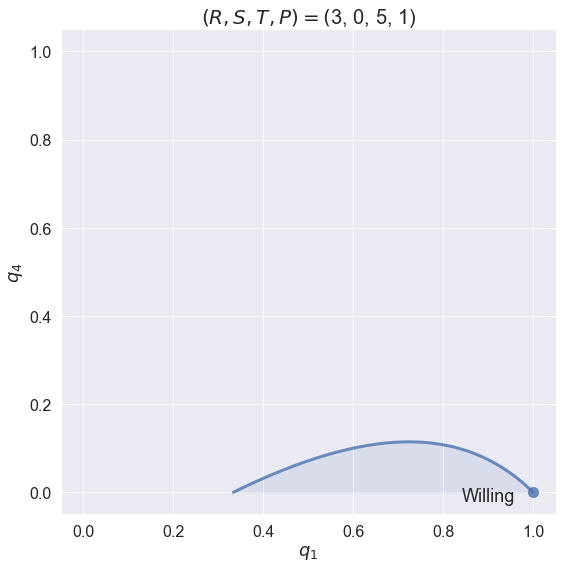

In [15]:
s_XC = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_2, q_1), (q_3, q_1)]))
figure_2CD(s_XC, payoff_con_subs, Willing_q, 'Willing', fsize = (8, 8), ms = 20, fs = 20)

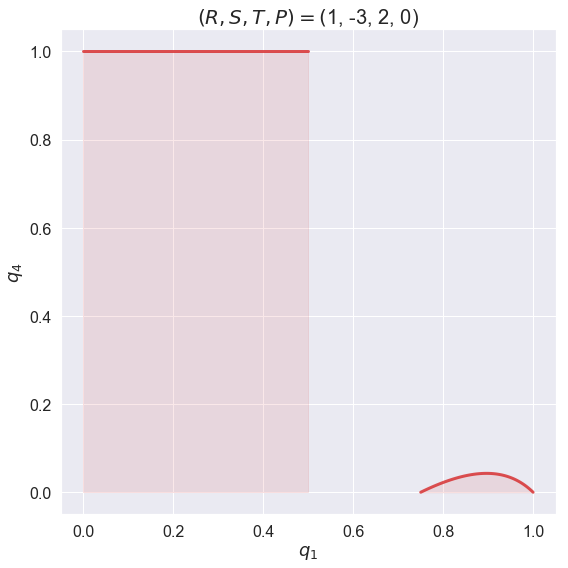

In [16]:
figure_2CD(s_XC, payoff_abn_subs, Willing_q, 'Willing', fsize = (8, 8), ms = 20, fs = 20)

### E and F

In [17]:
eqs = (1 - (R - O)*phi*(chi - 1) - p_1, 
       1 - phi*((T - O)*chi + (O - S)) - p_2, 
       phi*((O - S)*chi + (T - O)) - p_3, 
       (O - P)*phi*(chi - 1) - p_4)
s_gen = solve(eqs, p_1, p_2, p_3, p_4) 
s_X_gen = s_X.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])
s_Y_gen = s_Y.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])

In [18]:
num, deno = fraction(factor(s_X_gen.subs(phi, 1/((T - O)*chi + (O - S))) - s_X_gen.subs(phi, 1/((T - O)*chi + (O - S))/2)))

In [19]:
target_zero = factor(num/((T - S)*chi*(T*chi - O*chi + O - S)))
factor_1 = factor_list(target_zero)[1][1][0] # the linear function of chi
factor_0 = factor_list(target_zero)[1][0][0]*factor_list(target_zero)[0] # the chi-free term

In [20]:
h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
s_XD = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]).subs(q_4, h_D))
s_XD = collect(s_XD, chi)
num, deno = fraction(factor(diff(s_XD, chi)))
target_D = factor(num/(T - S))
d_D0, a_D0 = factor_list(target_D)[1][0][0], factor_list(target_D)[0]*factor_list(target_D)[1][1][0]
d_D0 = collect(collect(collect(d_D0, q_3), q_2), q_1) 
a_D0 = collect(collect(collect(a_D0, q_3), q_2), q_1) 
a_D0, d_D0

In [21]:
def figure_2E(s_X, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    
    colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    
    A = [1, 0, 1]
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    E = [(T - R)/(T - P), 0, (P - S)/(T - P)]
    
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    E = [float(E[0].subs(payoff_subs)), E[1], float(E[2].subs(payoff_subs))]

    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection='3d')
    
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], alpha = 0.05)
    
    # draw surface ZD (ADE), GZD (ACD), Equalizer (BCDE)
    k_list = [1, 2, 0]
    for i, polygon in enumerate([(A, D, E), (A, C, D), (B, C, D, E)]):
        x = np.array([item[0] for item in polygon])
        y = np.array([item[1] for item in polygon])
        z = np.array([item[2] for item in polygon])
        ax.scatter(x, y, z, color = colors[k_list[i]], alpha = 0)

        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = Poly3DCollection(verts, alpha = 0.3, facecolor = colors[k_list[i]], edgecolor = 'none')
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
    
    # draw lines
    for pair in [(A, B), (A, C), (B, C), (A, D), (C, D), (A, E), (B, E), (D, E)]:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
    
    # draw points
    names = ['A', 'B', 'C', 'D', 'E']
    for i, point in enumerate([A, B, C, D, E]):
        ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 100)
        ax.text(point[0], point[1], point[2], names[i], size = fs - 2, color = 'black', zorder = 200) 
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs)
    
    #plt.colorbar(surf)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.tick_params(axis = 'all', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'all', which = 'minor', labelsize = fs - 4)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    
    plt.savefig(_Figure_PATH_ + "2E.png", dpi = 400, transparent = True, bbox_inches = 'tight')
    

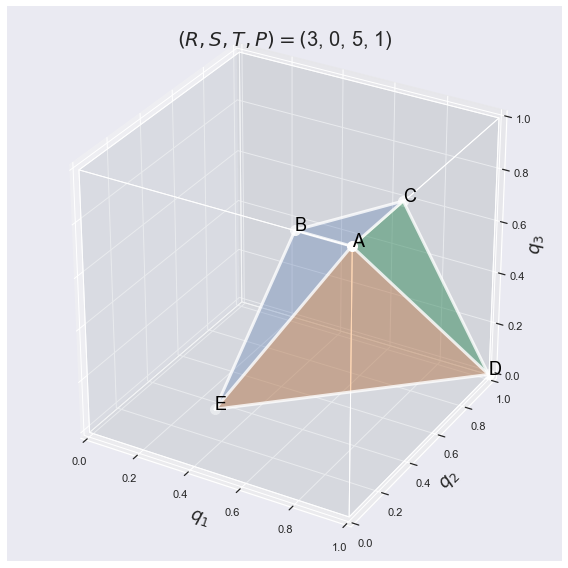

In [22]:
figure_2E(s_XD, payoff_con_subs, fsize = (8, 8), ms = 100, fs = 20)

In [23]:
def figure_2F(s_X, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    
    colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    
    A = [1, 0, 1]
    B = [(2*P - R - S)/(P - S), (2*P - T - S)/(P - S), 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    
    B = [float(B[0].subs(payoff_subs)), float(B[1].subs(payoff_subs)), B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]

    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection='3d')
    
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], alpha = 0.05)
    
    
    # draw surface ZD (ABD), GZD (ACD), Equalizer (BCD)
    k_list = [1, 2, 0]
    for i, polygon in enumerate([(A, B, D), (A, C, D), (B, C, D)]):
        x = np.array([item[0] for item in polygon])
        y = np.array([item[1] for item in polygon])
        z = np.array([item[2] for item in polygon])
        ax.scatter(x, y, z, color = colors[k_list[i]], alpha = 0)

        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = Poly3DCollection(verts, alpha = 0.3, facecolor = colors[k_list[i]], edgecolor = 'none')

        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
    
    # draw lines
    for pair in [(A, B), (A, C), (B, C), (A, D), (B, D), (C, D)]:
        if pair == (B, D):
            ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    linestyle = ':', linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
        else:   
            ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
    
    # draw points
    names = ['A', 'B', 'C', 'D']
    for i, point in enumerate([A, B, C, D]):
        ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 100)
        ax.text(point[0], point[1], point[2], names[i], size = fs - 2, color = 'black', zorder = 200) 
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs)
    
    #plt.colorbar(surf)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.tick_params(axis = 'all', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'all', which = 'minor', labelsize = fs - 4)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    
    plt.savefig(_Figure_PATH_ + "2F.png", dpi = 400, transparent = True, bbox_inches = 'tight')
    

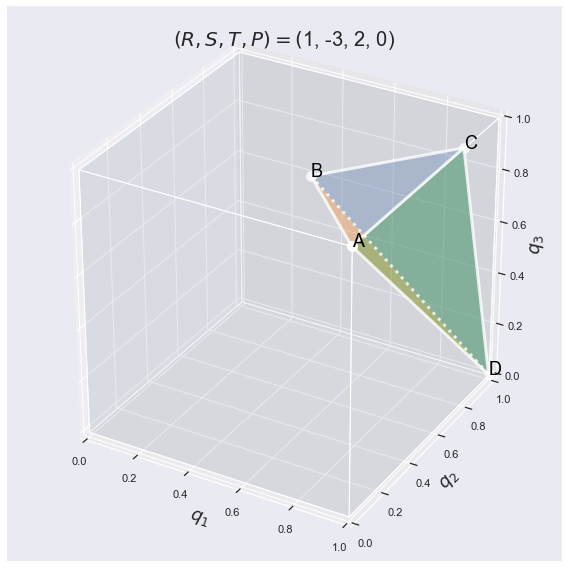

In [24]:
figure_2F(s_XD, payoff_abn_subs, fsize = (8, 8), ms = 100, fs = 20)